# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [2]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')

In [3]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [4]:
df.describe()

,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


In [5]:
print('There is %d' %len(df['temperature']) + 'data points in this dataset.')

There is 130data points in this dataset.


### Task 1: Determine whether the distribution of body temperatures normal?

In order to determine whether the distribution of body temperatures is normal, a histogram of this dataset will need to be conducted for further comparison to an empirical normal probability curve (probability density function, PDF). If the histogram fits the empirical normal curve, we could say this datset is normally distributed. However,the shape of the histogram can be distorted due to the number of bins chosen, an additional test such as D'Agostino K-squared test should also be performed to check for the normality of the dataset of interest. Additionally, when the dataset is small, it would be difficult to identify whether the given dataset fits well with the PDF, thus another graphical method such as quantile-quantile plot should be conducted as well. 

#### Step 1: Checking the histogram of the body temperature dataset against the probability density function (PDF)

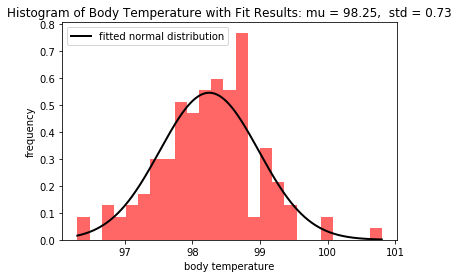

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm


%matplotlib inline 

#Fit the given dataset to a normal distribution. The obtained parameters 
#are the mean and the standard deviation of the fitted normal curve
mu, std = norm.fit(np.array(df['temperature']))

#Generate an array of x-values based on the min and max values of the given boday temperature dataset
xmin, xmax = np.min(df['temperature']), np.max(df['temperature'])
x = np.linspace(xmin, xmax, 1000)

#Calculate the probability of x array
p = norm.pdf(x, mu, std)

#Plotting histogram and the line plot together
plt.hist(df['temperature'], bins=25, density=True, alpha=0.6, color='r')
plt.plot(x, p, 'k', linewidth=2)
title = "Fit Results: mu = %.2f,  std = %.2f" % (mu, std)
plt.xlabel('body temperature')
plt.ylabel('frequency')
plt.title('Histogram of Body Temperature with %s' %title)
plt.legend(['fitted normal distribution'])
plt.show()

The resulted graph above shows that the given dataset seems to be normally distributed when compare to the fitted normal distribution curve. However, an additional test is needed to confirm this result. 

#### Step 2: Test the body temperature dataset against the D'Agostino K-Squared Test

In [7]:
import scipy.stats as stats
test = stats.mstats.normaltest(df['temperature'])

def test_null(p_value):
    'Set an alpha value for statistical significance measurement of \
    the null hypothesis the given body temperature dataset is likely to come from \
    a normal distribution'
    
    alpha = 0.05
    if p_value < alpha: 
        result = 'The null hyposthesis is rejected.'
    else: 
        result = 'The null hypothesis cannot be rejected.'
    return result
        
print(test_null(test[1]))

The null hypothesis cannot be rejected.


According to the results obtained from running the D'Agostino K-Squared Test, there is a 25.9% chance that the null hypothesis, which indicates that the given dataset is normally distributed. Since this p-value is not very small (>0.05), it means that is likely that this dataset came from a normal distribution. 
Finally, since the sample size of this given dataset is only 130, it would be best to perform another graphical method to confirm the conclusion. The next step in this analysis will involve plotting a quantile-quantile plot to validate the normality of this dataset. 

#### Step 3: Quantile-quantile plot 

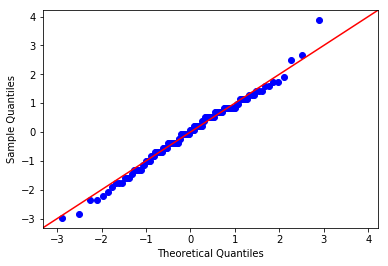

In [8]:
import statsmodels.api as sm

sm.qqplot(df['temperature'], stats.t, fit=True, line='45')
plt.show()

A quantile-quantile plot (Q-Q plot) is a probability plot that can be used to show whether a given dataset is normally distributed by comparing its probability distributions's quantiles to a normal distribution's quantiles. If the points on the Q-Q plot lie on the line y=x, then the given data set is considered to come from a normal distribution. The generated figure above shows that there is a linear correlation between the sample quantiles and the theorical quantiles, which indicates the body temperature dataset is normally distributed. 

### Task 2: Is the sample size large? Are the observations independent?

The sample size of this given dataset is 130, which is considered to be large based on the central limit theorem. The reason behind this number is that: if there is a population with mean (mu) and standard deviation (sigma) and a sufficiently large random samples of the size 30 or larger are taken, then the sample means will be approximately normally distributed. When the sample size is less than 30, then this fact would not hold to be true. 

The observations are independent for this dataset since they are taken from different people. 

### Task 3: Is the true population mean really 98.6 degrees F?

#### Step 1: Boostrap Hypothesis Testing

In order to solve for this problem, a hypothesis test will need to be conducted. The null hypothesis would be that the true mean of body temperature is 98.6 F while the alternative hypothesis would be the mean of the body temperature is different from 98.6 F. Let T be the mean of body temperature, then the following statements would be applied for this hypothesis test. 

H <sub>o </sub>: T = 98.6 F

H <sub>a </sub>: T <> 98.6 F

The mean of bootstrap replicates is 98.599841
The standard error of the mean body temperature is 0.064057:
The p-value of the number of bootstrap replicates that have a mean of 98.6 is 0:which is much less than alpha=0.025.
The null hyposthesis is rejected.


/home/ives/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


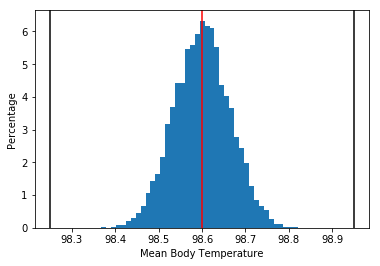

In [30]:
size=10000
alpha = 0.05

# Under the assumption that the null hypothesis is true, we will need to shift the mean of the temperature dataset 
# to be exactly 98.6 
shifted_temp = df['temperature'] -np.mean(df['temperature']) + 98.6

def draw_bs_replicates(data, func, size):
    #Initialize array of replicates 
    bs_replicates = np.empty(size)
    for i in range(size):
        # Generate bootstrap sample: bs_sample
        bs_sample = np.random.choice(data, len(data))
        #Calculate the mean of bootstrap sample
        rep = func(bs_sample)
        bs_replicates[i] = rep
    return bs_replicates

#Compute and print mean of boostrap replicates
bs_replicates = draw_bs_replicates(shifted_temp, np.mean, size)
bs_mean = np.mean(bs_replicates)
print('The mean of bootstrap replicates is %f' %bs_mean)

#Compute and print the standard error of the means
sem = np.std(df['temperature'])/np.sqrt(len(df))
print('The standard error of the mean body temperature is %f:' %sem)


#Compute and print p-value:
observed_mean1 = np.mean(df['temperature'])
interval = 98.6 - observed_mean1
observed_mean2 = bs_mean + interval

p = np.sum(np.sum(bs_replicates < observed_mean1) + np.sum(bs_replicates > observed_mean2))/len(bs_replicates)
print('The p-value of the number of bootstrap replicates that have a mean of 98.6 is %d:' %p + \
     'which is much less than alpha=0.025.')

#Testing null hypothesis using p-value
print(test_null(p))

#Generate histogram plot of the results
plt.hist(bs_replicates, bins=40, normed=True)
plt.xlabel('Mean Body Temperature')
plt.ylabel('Percentage')
plt.axvline(x=98.6, color='r')
plt.axvline(x=observed_mean1, color='k')
plt.axvline(x=observed_mean2, color='k')
plt.show()


#### Step 2: Frequentist Statistical Testing

A one-sample frequentist statistical test would be appropriate in this scenario since the dataset of boday temperatures will be tested against the population mean of 98.6 F. Since the population standard deviation is unknown, the t-statistic is more appropriate than the z-statistic in this case. However, since the sample size of this dataset is 130, which is sufficiently large and thus the results for the mean confidence interval obtained from both z-statistic and t-statistic should be similar. In this scenario, both a two-tailed t-test and z-test will be performed to compare the results obtained for a 95% confidence interval. A two-tailed t-test is needed since we are testing whether the true mean of the body temperature is 98.6 or not. 

In [10]:
#Testing using t-score
ttest = stats.ttest_1samp(df['temperature'], 98.6)
print('The t-value is %f' %ttest[0] + ' and the p-value is %f' %ttest[1])
print('Since the p-value of the two-tailed t-test is greater than 0.05, ' + test_null(ttest[1]))

#Testing using z_score

mean = np.mean(df['temperature'])
std = np.std(df['temperature'])
z_val = (mean - 98.6)/(std/np.sqrt(len(df)))
z_test = stats.norm.cdf(z_val)*2
print('The z-value is %f' %z_val + ' and the p-value is %f' %z_test)
print('Since the p-value of the two-tailed z-test is much less than 0.05, ' + test_null(z_test))

The t-value is -5.454823 and the p-value is 0.000000
Since the p-value of the two-tailed t-test is greater than 0.05, The null hyposthesis is rejected.
The z-value is -5.475925 and the p-value is 0.000000
Since the p-value of the two-tailed z-test is much less than 0.05, The null hyposthesis is rejected.


### Task 4: Draw a small sample of size 10 from the data and repeat both frequentist tests.
+ Which one is the correct one to use?
+ What do you notice? What does this tell you about the difference in application of the  tt  and  zz  statistic?

In [11]:
np.random.seed(22)
a = np.arange(130)
inds = np.random.choice(a, 10)
selected = df['temperature'][inds]

Since the sample size is 10 this time, z-score would not be the appropriate statistic to use here anymore. Instead, the t-test should be used to validate the null hypothesis. 

In [12]:
ttest = stats.ttest_1samp(selected, 98.6)
print('The t-value is %f' %ttest[0] + ' and the p-value is %f' %ttest[1])
print('Since the p-value of the two-tailed t-test is greater than 0.05, ' + test_null(ttest[1]))

mean = np.mean(selected)
std = np.std(selected)
z_val = (mean - 98.6)/(std/np.sqrt(len(selected)))
z_test = stats.norm.cdf(z_val)*2
print('The z-value is %f' %z_val + ' and the p-value is %f' %z_test)
print('Since the p-value of the two-tailed z-test is much less than 0.05, ' + test_null(z_test))

The t-value is -1.516629 and the p-value is 0.163668
Since the p-value of the two-tailed t-test is greater than 0.05, The null hypothesis cannot be rejected.
The z-value is -1.598668 and the p-value is 0.109894
Since the p-value of the two-tailed z-test is much less than 0.05, The null hypothesis cannot be rejected.


The conclusion of whether or not the true mean of body temperature is 98.6 F changed dramatically after using a different sample size. This fact tells us that these two tests are sample-size dependent and we need to take caution when using them. 

### Task 5: At what temperature should we consider someone's temperature to be "abnormal"?
+ As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
+ Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.

In [13]:
# Determine the 95% and 99% confidence interval for the mean of body temperature using t and z-score
def confidence_interval(data, ci, two_tails= None):
    mu = np.mean(data)
    sigma = np.std(data)
    n = len(data)
    if two_tails:
        t = stats.t.ppf(ci+(1-ci)/2, n-1)
        z = stats.norm.ppf(ci+(1-ci)/2)
    else:
        t = stats.t.ppf(ci, n-1)
        z = stats.norm.pdf(ci+(1-ci)/2)
    hight = mu + t*sigma/np.sqrt(n)
    lowt = mu - t*sigma/np.sqrt(n)
    highz = mu + z*sigma/np.sqrt(n)
    lowz = mu - z*sigma/np.sqrt(n)
    return round(hight, 2), round(lowt,2), round(highz, 2), round(lowz,2) 

cf95 = confidence_interval(df['temperature'], 0.95, True)
print ("The range of true mean of body temperature using 95% confidence interval and t-statistic is from ",\
       cf95[1], ' to ', cf95[0])
print ("The range of true mean of body temperature using 95% confidence interval and z-statistic is from ",\
       cf95[3], ' to ', cf95[2])

cf99 = confidence_interval(df['temperature'], 0.99, True)
print ("The range of true mean of body temperature using 99% confidence interval and t-statistic is from ",\
       cf99[1], ' to ', cf99[0])
print ("The range of true mean of body temperature using 99% confidence interval and z-statistic is from ",\
       cf99[3], ' to ', cf99[2])

The range of true mean of body temperature using 95% confidence interval and t-statistic is from  98.12  to  98.38
The range of true mean of body temperature using 95% confidence interval and z-statistic is from  98.12  to  98.37
The range of true mean of body temperature using 99% confidence interval and t-statistic is from  98.08  to  98.42
The range of true mean of body temperature using 99% confidence interval and z-statistic is from  98.08  to  98.41


In [14]:
#Determine the 95% and 99% confidence interval for the mea of body temperature using bootstrap method
conf_int95 = np.percentile(bs_replicates, [2.5, 97.5])
print ('The 95% confidence interval of the mean body temperatures is from', conf_int95[0], 'to ', \
       conf_int95[1], 'by using bootstrap method.')

conf_int99 = np.percentile(bs_replicates, [0.5, 99.5])
print ('The 99% confidence interval of the mean body temperatures is from', conf_int99[0], 'to ', \
       conf_int99[1], 'by using bootstrap method.')

The 95% confidence interval of the mean body temperatures is from 98.47307692307692 to  98.72615384615384 by using bootstrap method.
The 99% confidence interval of the mean body temperatures is from 98.43307692307691 to  98.76384615384615 by using bootstrap method.


### Task 6: Is there a significant difference between males and females in normal temperature?
+ What testing approach did you use and why?
+ Write a story with your conclusion in the context of the original problem.

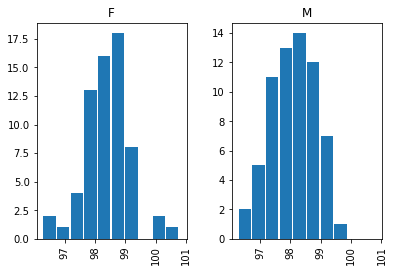

In [15]:
# Observe the dataset for both male and female
df['temperature'].hist(by=df['gender'], width=0.4, range=[xmin, xmax])
None

In [16]:
males = df['temperature'][df['gender'] == 'M']
females = df['temperature'][df['gender'] == 'F']
males.describe()

count    65.000000
mean     98.104615
std       0.698756
min      96.300000
25%      97.600000
50%      98.100000
75%      98.600000
max      99.500000
Name: temperature, dtype: float64

In [17]:
females.describe()

count     65.000000
mean      98.393846
std        0.743488
min       96.400000
25%       98.000000
50%       98.400000
75%       98.800000
max      100.800000
Name: temperature, dtype: float64

A two-sample z-test should be used to compare the difference between males and females in normal temperatures. A two-sample z-test is the most appropriate way to tackle this task since we can use to test the difference in means of the two samples: body temperatures of male verus body temperatures of females and the sample size of both datasets is larger than 30. The null hypothesis would be that there is no difference in body temperature between male and female. 

In [18]:
males = df['temperature'][df['gender'] == 'M']
females = df['temperature'][df['gender'] == 'F']

mean_diff = np.mean(males) - np.mean(females)
std_diff = np.sqrt(np.var(males)/len(males) + np.var(females)/len(females))
z_diff = mean_diff/std_diff
z_critical = stats.norm.pdf(0.975) #two-tailed test at alpha=0.05
p_diff = stats.norm.sf(abs(z_diff))*2 #twosided

print('The z-value is %f' %z_diff, ' and the corresponding p-value is %f' %p_diff)
if np.abs(z_diff) > z_critical:
    print('Since the absolute statistical z value is greater than the critical z value, we reject null hypothesis.')
else:
    print ('Since the absolute statistical z value is less than the critical z value, we fail reject null hypothesis.')

The z-value is -2.303220  and the corresponding p-value is 0.021266
Since the absolute statistical z value is greater than the critical z value, we reject null hypothesis.


The null hypothesis, which states that there is no difference between the body temperatures of male and females is rejected based on this two-sample two-tailed z-test

In [19]:
#Determine the differernce in the mean body temperatures between males and females using bootstrap method
mean_concatenated = np.mean(np.concatenate((males, females)))

#Shifted array
males_shifted = males - np.mean(males) + mean_concatenated
females_shifted = females - np.mean(females) + mean_concatenated

#Compute 10,000 bs replicates from shifted set
bs_replicates_males = draw_bs_replicates(males_shifted, np.mean, 10000)
bs_replicates_females = draw_bs_replicates(females_shifted, np.mean, 10000)

#Get replicates of difference of means: 
bs_replicates = bs_replicates_males - bs_replicates_females

#Compute and print p-value:
p_less = np.sum(bs_replicates <= mean_diff)/10000
p_greater = np.sum(bs_replicates >= mean_diff)/1000
print (p_less, p_greater)

print('Since the calculated p value is less than 0.025 for a two-tailed z-test,\
we would reject the null hypothesis and conclude that there is evidence that there is difference \
in the mean body temperatures between men and women')

0.011 9.89
Since the calculated p value is less than 0.025 for a two-tailed z-test,we would reject the null hypothesis and conclude that there is evidence that there is difference in the mean body temperatures between men and women


### Conclusions
+ Even though 98.6 has been accepted as the normal body temperature for a long time, 98.6 F is not within  either the 95% confidence interval or the 99% confidence interval of the true mean body temperatures as indicated in this statistical data analysis. Therefore, this temperature is considered to be abnormal.

+ The mean temperatures for men and women are 98.1 and 98.4 F, respectively. According to the conducted two-sample two-tailed z-test, the statistical z-value is -2.303, whose absolute value is greater than the critical z-value at alpha=0.05. The corresponding p-value of this statistical z-value is 0.021266 < 0.05 and there fore, the null hypothesis, which stated that there is no difference in the mean body temperatures of women and men, is rejected. 
